<a href="https://colab.research.google.com/github/EvADarya/Data_processing-DLS-/blob/main/DL_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df_test = pd.read_csv('/game_of_thrones_train.csv',index_col = 'S.No')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [ ]:
df_test.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [ ]:
#Сначала работаем с категориальными признаками. Создаём отдельный датафрейм
categorical_features = ['name', 'title','culture','mother','father','heir','spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble','isAlive']
df_test_categorical = pd.DataFrame(df_test[categorical_features])
df_test_categorical

,name,title,culture,mother,father,heir,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,isAlive
S.No,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,0
2,Walder Frey,Lord of the Crossing,Rivermen,NaN,NaN,NaN,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,1
3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,1
4,Aemma Arryn,Queen,NaN,NaN,NaN,NaN,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,0
5,Sylva Santagar,Greenstone,Dornish,NaN,NaN,NaN,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,NaN,NaN,NaN,NaN,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,1
1554,Masha Heddle,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,0
1555,Matthos Seaworth,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
#Обрабатываем не числовые данные
unprocessed_cat_test_features = df_test_categorical.select_dtypes(include=[object])
unprocessed_cat_test_features

,name,title,culture,mother,father,heir,spouse
S.No,,,,,,,
1,Viserys II Targaryen,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN
2,Walder Frey,Lord of the Crossing,Rivermen,NaN,NaN,NaN,Perra Royce
3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN
4,Aemma Arryn,Queen,NaN,NaN,NaN,NaN,Viserys I Targaryen
5,Sylva Santagar,Greenstone,Dornish,NaN,NaN,NaN,Eldon Estermont
...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,NaN,NaN,NaN,NaN,NaN
1554,Masha Heddle,NaN,NaN,NaN,NaN,NaN,NaN
1555,Matthos Seaworth,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
processed_cat_test_features = pd.DataFrame()
label_encoding = LabelEncoder()

In [ ]:
#Группировка по культурам - уменьшение количесвта уникальных значений для последующей кодировки
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
    cultures_grouped_inverted.update({v:k})
#Добавляем данные в результирующий датафрейм
processed_cat_test_features['culture_grouped'] = unprocessed_cat_test_features['culture'].str.lower().map(cultures_grouped_inverted)
processed_cat_test_features['culture_no_data'] = [1 if x == True else 0 for x in unprocessed_cat_test_features['culture'].isna()]


In [ ]:
#Кодируем label-encoding
processed_cat_test_features['culture_grouped'] = label_encoding.fit_transform(processed_cat_test_features['culture_grouped'])

In [ ]:
unprocessed_cat_test_features

,name,title,culture,mother,father,heir,spouse
S.No,,,,,,,
1,Viserys II Targaryen,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN
2,Walder Frey,Lord of the Crossing,Rivermen,NaN,NaN,NaN,Perra Royce
3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN
4,Aemma Arryn,Queen,NaN,NaN,NaN,NaN,Viserys I Targaryen
5,Sylva Santagar,Greenstone,Dornish,NaN,NaN,NaN,Eldon Estermont
...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,NaN,NaN,NaN,NaN,NaN
1554,Masha Heddle,NaN,NaN,NaN,NaN,NaN,NaN
1555,Matthos Seaworth,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Заменяем тиутл просто на его наличие
processed_cat_test_features['is_title'] = np.where(unprocessed_cat_test_features['title'].isna(), 0, 1)

In [ ]:
processed_cat_test_features

,culture_grouped,culture_no_data,is_title
S.No,,,
1,11,1,0
2,5,0,1
3,11,1,1
4,11,1,1
5,0,0,1
...,...,...,...
1553,11,1,1
1554,11,1,0
1555,11,1,0


In [ ]:
#Работаем с числовыми категорияльными признаками
unprocessed_cat_test_features = df_test_categorical.select_dtypes(include=[int,float])
unprocessed_cat_test_features

,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,isAlive
S.No,,,,,,,,,,,,
1,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,0
2,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,1
3,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,1
4,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,0
5,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,1
1554,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,0
1555,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,0


<Axes: >

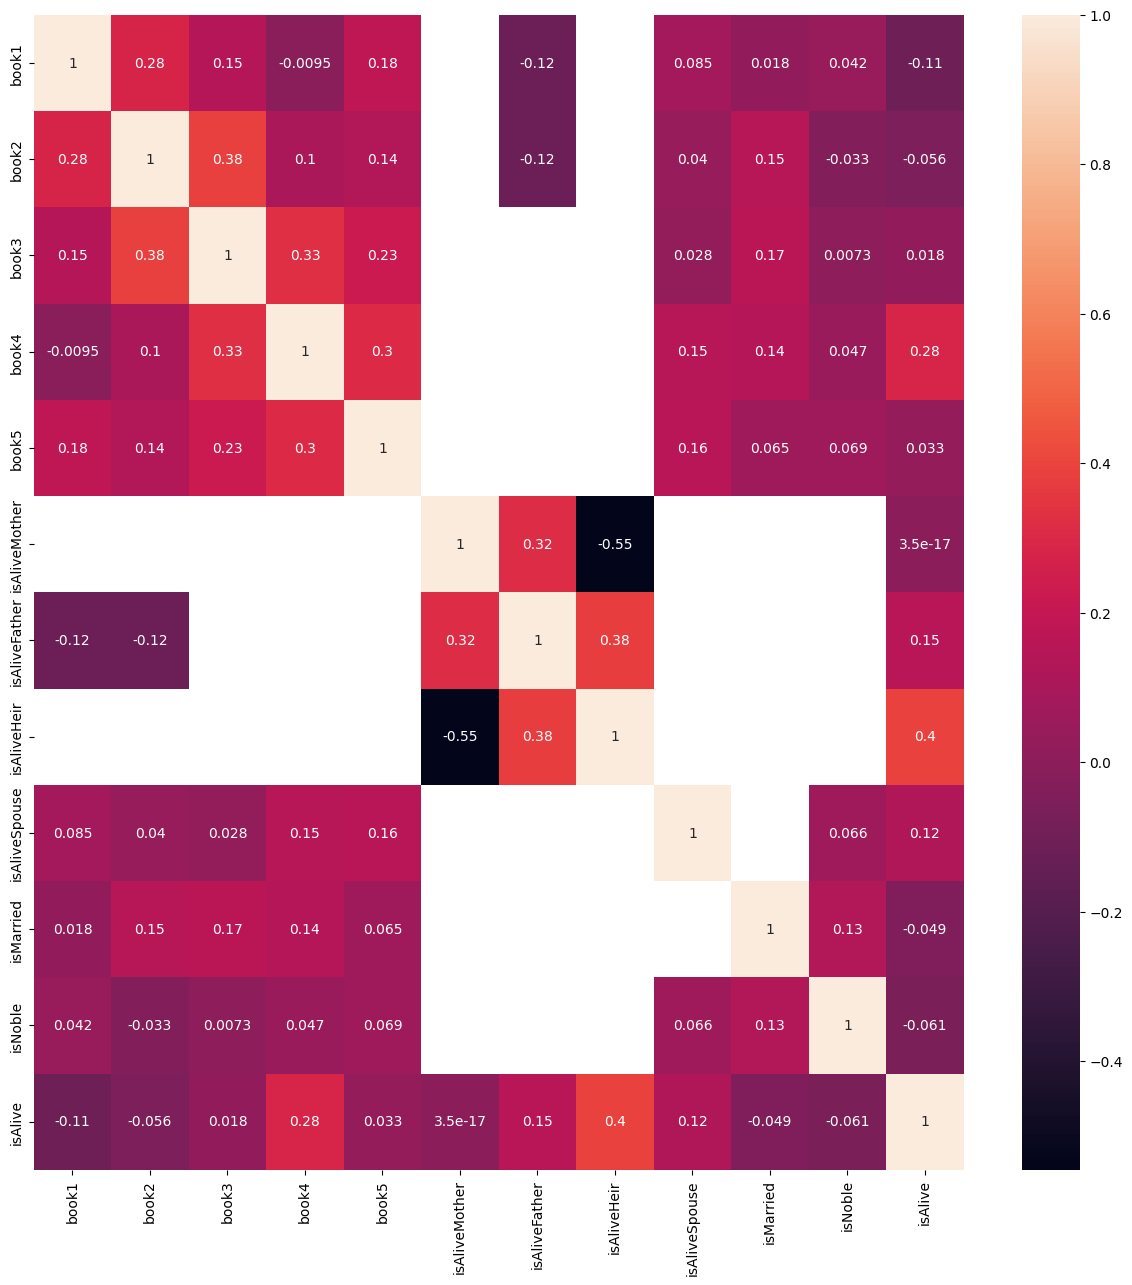

In [ ]:
corr_matrix = unprocessed_cat_test_features.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True)


In [ ]:
#Добавляем столбы наличия инфы в столбце и информации из столбца
processed_cat_test_features['isAliveFather_value'] = [0 if np.isnan(x) else x for x in unprocessed_cat_test_features['isAliveFather']]
processed_cat_test_features['isAliveFather_no_data'] = [1 if np.isnan(x) else 0 for x in unprocessed_cat_test_features['isAliveFather']]

processed_cat_test_features['isAliveSpouse_value'] = [0 if np.isnan(x) else x for x in unprocessed_cat_test_features['isAliveSpouse']]
processed_cat_test_features['isAliveSpouse_no_data'] = [1 if np.isnan(x) else 0 for x in unprocessed_cat_test_features['isAliveSpouse']]

processed_cat_test_features['isAliveHeir_value'] = [0 if np.isnan(x) else x for x in unprocessed_cat_test_features['isAliveHeir']]
processed_cat_test_features['isAliveHeir_no_data'] = [1 if np.isnan(x) else 0 for x in unprocessed_cat_test_features['isAliveHeir']]
#переносим в таблицу наиболее значимые признаки из heatmap
processed_cat_test_features['book1'] = unprocessed_cat_test_features['book1']
processed_cat_test_features['book4'] = unprocessed_cat_test_features['book4']

In [ ]:
processed_cat_test_features

,culture_grouped,culture_no_data,is_title,isAliveFather_value,isAliveFather_no_data,isAliveSpouse_value,isAliveSpouse_no_data,isAliveHeir_value,isAliveHeir_no_data,book1,book4
S.No,,,,,,,,,,,
1,11,1,0,0.0,0,0.0,1,0.0,0,0,0
2,5,0,1,0.0,1,1.0,0,0.0,1,1,1
3,11,1,1,0.0,1,0.0,1,0.0,1,0,1
4,11,1,1,0.0,1,0.0,0,0.0,1,0,0
5,0,0,1,0.0,1,1.0,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1553,11,1,1,0.0,1,0.0,1,0.0,1,1,1
1554,11,1,0,0.0,1,0.0,1,0.0,1,1,0
1555,11,1,0,0.0,1,0.0,1,0.0,1,0,1


In [ ]:
#Обрабатываем числовые признаки
numerical_features = pd.DataFrame(data = df_test[['age', 'numDeadRelations', 'popularity', 'isAlive','dateOfBirth']])
numerical_features

,age,numDeadRelations,popularity,isAlive,dateOfBirth
S.No,,,,,
1,NaN,11,0.605351,0,NaN
2,97.0,1,0.896321,1,208.0
3,NaN,0,0.267559,1,NaN
4,23.0,0,0.183946,0,82.0
5,29.0,0,0.043478,1,276.0
...,...,...,...,...,...
1553,NaN,0,0.160535,1,NaN
1554,NaN,0,0.040134,0,NaN
1555,NaN,0,0.076923,0,NaN


In [ ]:
numerical_features['age_value'] = [0 if np.isnan(x) else x for x in numerical_features['age']]
numerical_features['age/birth_no_data'] = [1 if np.isnan(x) else 0 for x in numerical_features['age']]
numerical_features['bitrh_value'] = [0 if np.isnan(x) else x for x in numerical_features['dateOfBirth']]

numerical_features.loc[numerical_features['numDeadRelations']>0, "boolDeadRelations"] = 1
numerical_features.loc[numerical_features['numDeadRelations'] == 0, "boolDeadRelations"] = 0
#нормализуем колонку popularity
numerical_features['popularity']=np.log10(numerical_features["popularity"]*100+1)

In [ ]:
numerical_features.drop(['age','numDeadRelations'],axis = 1, inplace = True)

In [ ]:
#Обработааные данные для трэйна
train_data = pd.concat([numerical_features,processed_cat_test_features],axis = 1)

<Axes: >

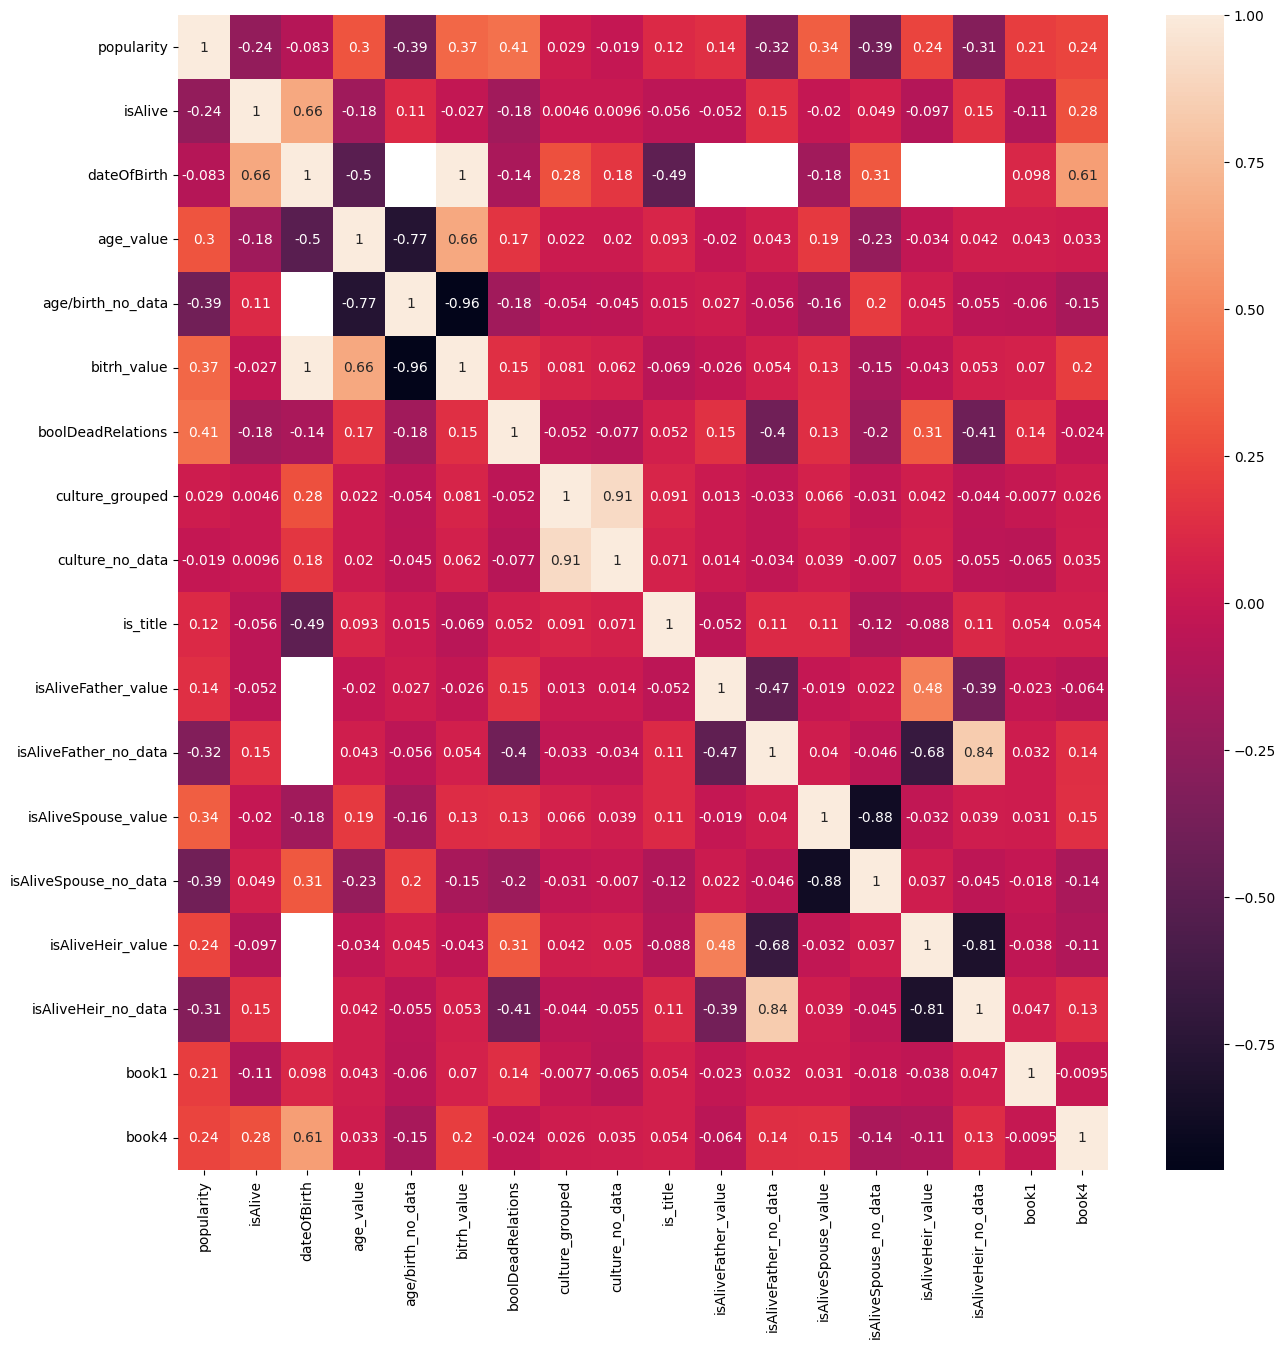

In [ ]:
corr = train_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)

In [ ]:
train_data.drop('dateOfBirth',axis = 1,inplace = True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   popularity             1557 non-null   float64
 1   isAlive                1557 non-null   int64  
 2   age_value              1557 non-null   float64
 3   age/birth_no_data      1557 non-null   int64  
 4   bitrh_value            1557 non-null   float64
 5   boolDeadRelations      1557 non-null   float64
 6   culture_grouped        1557 non-null   int64  
 7   culture_no_data        1557 non-null   int64  
 8   is_title               1557 non-null   int64  
 9   isAliveFather_value    1557 non-null   float64
 10  isAliveFather_no_data  1557 non-null   int64  
 11  isAliveSpouse_value    1557 non-null   float64
 12  isAliveSpouse_no_data  1557 non-null   int64  
 13  isAliveHeir_value      1557 non-null   float64
 14  isAliveHeir_no_data    1557 non-null   int64  
 15  book1    

In [ ]:
y = train_data['isAlive'].values
X = train_data.drop('isAlive',axis = 1).values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8462


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Аналогичный пайплайн для теста
data = pd.read_csv('/game_of_thrones_test.csv')

In [ ]:
data.loc[data['age']<0]
data.loc[1685, 'dateOfBirth'] = 278.
data.loc[1869, 'dateOfBirth'] = 299.

In [ ]:
data.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
0,1558.0,Melissa Blackwood,NaN,0.0,NaN,156.0,NaN,NaN,NaN,House Blackwood,...,1.0,NaN,NaN,NaN,NaN,0.0,0.0,100.0,0.0,0.050167
1,1559.0,Melisandre,NaN,0.0,Asshai,NaN,NaN,NaN,NaN,R'hllor,...,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.745819
2,1560.0,Merrit,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.010033
3,1561.0,Meryn Trant,Ser,1.0,NaN,NaN,NaN,NaN,NaN,House Trant,...,1.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,0.220736
4,1562.0,Merrett Frey,NaN,1.0,Riverlands,262.0,NaN,NaN,NaN,House Frey,...,1.0,NaN,NaN,NaN,1.0,1.0,0.0,38.0,0.0,0.434783


In [ ]:
categorical_features = ['name', 'title','culture','mother','father','heir','spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble']
data_categorical = pd.DataFrame(data[categorical_features])

In [ ]:
data_categorical

,name,title,culture,mother,father,heir,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble
0,Melissa Blackwood,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,0,0
1,Melisandre,NaN,Asshai,NaN,NaN,NaN,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0
2,Merrit,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,NaN,NaN,NaN,NaN,0,0
3,Meryn Trant,Ser,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,1
4,Merrett Frey,NaN,Riverlands,NaN,NaN,NaN,Mariya Darry,1,1,1,1,1,NaN,NaN,NaN,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0
385,Reek,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0
386,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0
387,Coldhands,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0


In [ ]:
unprocessed_cat_features = data_categorical.select_dtypes(include=[object])
processed_cat_features = pd.DataFrame()
processed_cat_features['culture_grouped'] = unprocessed_cat_features['culture'].str.lower().map(cultures_grouped_inverted)
processed_cat_features['culture_no_data'] = [1 if x == True else 0 for x in unprocessed_cat_features['culture'].isna()]
processed_cat_features['culture_grouped'] = label_encoding.fit_transform(processed_cat_features['culture_grouped'])

In [ ]:
unprocessed_cat_features

,name,title,culture,mother,father,heir,spouse
0,Melissa Blackwood,NaN,NaN,NaN,NaN,NaN,NaN
1,Melisandre,NaN,Asshai,NaN,NaN,NaN,NaN
2,Merrit,NaN,NaN,NaN,NaN,NaN,NaN
3,Meryn Trant,Ser,NaN,NaN,NaN,NaN,NaN
4,Merrett Frey,NaN,Riverlands,NaN,NaN,NaN,Mariya Darry
...,...,...,...,...,...,...,...
384,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN
385,Reek,NaN,NaN,NaN,NaN,NaN,NaN
386,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN
387,Coldhands,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
processed_cat_features['is_title'] = np.where(unprocessed_cat_features['title'].isna(), 0, 1)

In [ ]:
processed_cat_features

,culture_grouped,culture_no_data,is_title
0,11,1,0
1,1,0,0
2,11,1,0
3,11,1,1
4,5,0,0
...,...,...,...
384,3,0,0
385,11,1,0
386,11,1,0
387,11,1,0


In [ ]:
unprocessed_cat_features =data_categorical.select_dtypes(include=[int,float])
unprocessed_cat_features

,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble
0,0,0,0,0,1,NaN,NaN,NaN,NaN,0,0
1,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0
2,0,0,1,1,0,NaN,NaN,NaN,NaN,0,0
3,1,1,1,1,1,NaN,NaN,NaN,NaN,0,1
4,1,1,1,1,1,NaN,NaN,NaN,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
384,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0
385,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0
386,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0
387,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0


In [ ]:
processed_cat_features['isAliveFather_value'] = [0 if np.isnan(x) else x for x in unprocessed_cat_features['isAliveFather']]
processed_cat_features['isAliveFather_no_data'] = [1 if np.isnan(x) else 0 for x in unprocessed_cat_features['isAliveFather']]

processed_cat_features['isAliveSpouse_value'] = [0 if np.isnan(x) else x for x in unprocessed_cat_features['isAliveSpouse']]
processed_cat_features['isAliveSpouse_no_data'] = [1 if np.isnan(x) else 0 for x in unprocessed_cat_features['isAliveSpouse']]

processed_cat_features['isAliveHeir_value'] = [0 if np.isnan(x) else x for x in unprocessed_cat_features['isAliveHeir']]
processed_cat_features['isAliveHeir_no_data'] = [1 if np.isnan(x) else 0 for x in unprocessed_cat_features['isAliveHeir']]

processed_cat_features['book1'] = unprocessed_cat_features['book1']
processed_cat_features['book4'] = unprocessed_cat_features['book4']

processed_cat_features

,culture_grouped,culture_no_data,is_title,isAliveFather_value,isAliveFather_no_data,isAliveSpouse_value,isAliveSpouse_no_data,isAliveHeir_value,isAliveHeir_no_data,book1,book4
0,11,1,0,0.0,1,0.0,1,0.0,1,0,0
1,1,0,0,0.0,1,0.0,1,0.0,1,0,1
2,11,1,0,0.0,1,0.0,1,0.0,1,0,1
3,11,1,1,0.0,1,0.0,1,0.0,1,1,1
4,5,0,0,0.0,1,1.0,0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
384,3,0,0,0.0,1,0.0,1,0.0,1,1,1
385,11,1,0,0.0,1,0.0,1,0.0,1,0,1
386,11,1,0,0.0,1,0.0,1,0.0,1,1,1
387,11,1,0,0.0,1,0.0,1,0.0,1,0,1


In [ ]:
numerical_features = pd.DataFrame(data = data[['age', 'numDeadRelations', 'popularity','dateOfBirth']])
numerical_features

,age,numDeadRelations,popularity,dateOfBirth
0,100.0,0,0.050167,156.0
1,NaN,0,0.745819,NaN
2,NaN,0,0.010033,NaN
3,NaN,0,0.220736,NaN
4,38.0,0,0.434783,262.0
...,...,...,...,...
384,NaN,0,0.351171,NaN
385,NaN,0,0.096990,NaN
386,NaN,0,0.030100,NaN
387,NaN,0,0.130435,NaN


In [ ]:
numerical_features['age_value'] = [0 if np.isnan(x) else x for x in numerical_features['age']]
numerical_features['age/birth_no_data'] = [1 if np.isnan(x) else 0 for x in numerical_features['age']]
numerical_features['bitrh_value'] = [0 if np.isnan(x) else x for x in numerical_features['dateOfBirth']]

numerical_features.loc[numerical_features['numDeadRelations']>0, "boolDeadRelations"] = 1
numerical_features.loc[numerical_features['numDeadRelations'] == 0, "boolDeadRelations"] = 0

numerical_features['popularity']=np.log10(numerical_features["popularity"]*100+1)

In [ ]:
numerical_features.drop(['age','numDeadRelations'],axis = 1, inplace = True)

In [ ]:
numerical_features

,popularity,dateOfBirth,age_value,age/birth_no_data,bitrh_value,boolDeadRelations
0,0.779360,156.0,100.0,0,156.0,0.0
1,1.878418,NaN,0.0,1,0.0,0.0
2,0.301756,NaN,0.0,1,0.0,0.0
3,1.363115,NaN,0.0,1,0.0,0.0
4,1.648148,262.0,38.0,0,262.0,0.0
...,...,...,...,...,...,...
384,1.557712,NaN,0.0,1,0.0,0.0
385,1.029343,NaN,0.0,1,0.0,0.0
386,0.603148,NaN,0.0,1,0.0,0.0
387,1.147475,NaN,0.0,1,0.0,0.0


In [ ]:
test_data = pd.concat([numerical_features,processed_cat_features],axis = 1)

In [ ]:
test_data.drop('dateOfBirth', axis = 1, inplace= True)

In [ ]:
test_data

,popularity,age_value,age/birth_no_data,bitrh_value,boolDeadRelations,culture_grouped,culture_no_data,is_title,isAliveFather_value,isAliveFather_no_data,isAliveSpouse_value,isAliveSpouse_no_data,isAliveHeir_value,isAliveHeir_no_data,book1,book4
0,0.779360,100.0,0,156.0,0.0,11,1,0,0.0,1,0.0,1,0.0,1,0,0
1,1.878418,0.0,1,0.0,0.0,1,0,0,0.0,1,0.0,1,0.0,1,0,1
2,0.301756,0.0,1,0.0,0.0,11,1,0,0.0,1,0.0,1,0.0,1,0,1
3,1.363115,0.0,1,0.0,0.0,11,1,1,0.0,1,0.0,1,0.0,1,1,1
4,1.648148,38.0,0,262.0,0.0,5,0,0,0.0,1,1.0,0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,1.557712,0.0,1,0.0,0.0,3,0,0,0.0,1,0.0,1,0.0,1,1,1
385,1.029343,0.0,1,0.0,0.0,11,1,0,0.0,1,0.0,1,0.0,1,0,1
386,0.603148,0.0,1,0.0,0.0,11,1,0,0.0,1,0.0,1,0.0,1,1,1
387,1.147475,0.0,1,0.0,0.0,11,1,0,0.0,1,0.0,1,0.0,1,0,1


In [ ]:
test_predictions = model.predict(test_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
submission = pd.read_csv("/submission.csv", index_col='S.No')

In [ ]:
submission['isAlive'] = test_predictions

In [ ]:
submission.to_csv("/content/my_submission.csv", index=False)